# Dependencies

In [114]:
from manim import *
import numpy as np
import math
import matplotlib.pyplot as plt

from manim.mobject.graphing.scale import LogBase

In [115]:
def remove_invisible_chars(mobject: SVGMobject) -> SVGMobject:
    """Function to remove unwanted invisible characters from some mobjects.

    Parameters
    ----------
    mobject
        Any SVGMobject from which we want to remove unwanted invisible characters.

    Returns
    -------
    :class:`~.SVGMobject`
        The SVGMobject without unwanted invisible characters.
    """
    # TODO: Refactor needed
    iscode = False
    if mobject.__class__.__name__ == "Text":
        mobject = mobject[:]
    elif mobject.__class__.__name__ == "Code":
        iscode = True
        code = mobject
        mobject = mobject.code
    mobject_without_dots = VGroup()
    if mobject[0].__class__ == VGroup:
        for i in range(len(mobject)):
            mobject_without_dots.add(VGroup())
            mobject_without_dots[i].add(*(k for k in mobject[i] if k.__class__ != Dot))
    else:
        mobject_without_dots.add(*(k for k in mobject if k.__class__ != Dot))
    if iscode:
        code.code = mobject_without_dots
        return code
    return mobject_without_dots

# Motivation

In [116]:
cpu = [.731, 5.791, 46.361, 366.099, 2625.191, 25506.877]
gpu = [304.546, 286.375, 288.374, 308.388, 282.316, 294.382]
N = [64, 128, 256, 512, 1024, 2048]

In [117]:
%%manim -qk -v WARNING Motivation

class Motivation(Scene):
    def construct(self):
        self.wait(2)
        title = Title("Matrix Multiplication")
        self.play(Write(title))
        self.wait(1)
        chart = BarChart(
            values=[1680.444971, .627282],
            bar_names=["CPU", "GPU"],
            y_range=[0, 2000, 100],
            y_length=6,
            x_length=10,
            x_axis_config={"font_size": 36},
        ).scale(0.9).to_edge(DOWN)

        # Different parts of BarChart
        x_axis = chart.x_axis
        y_axis = chart.y_axis
        bar_names = chart.x_axis.labels
        bars = chart.bars
        bars[0].color = RED
        bars[1].color = GREEN
        c_bar_lbls = chart.get_bar_labels(font_size=48)

        text_5 = Tex(r"GPU is 2678 times faster than CPU!").scale(0.65).next_to(c_bar_lbls[1], UP).shift(UP)
        self.play(Create(VGroup(bar_names, bars, c_bar_lbls)), Write(text_5))
        self.wait(1)
        text_6 = Tex(r"For Matrices of size 8000!").next_to(text_5, UP).shift(UP)
        self.play(Write(text_6))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        title = Title("CPU vs GPU")
        self.play(Write(title))
        self.wait(1)

        axes = Axes(
                    x_range=[0, max(N), 500],
                    y_range=[-1, 5, 1],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(custom_labels=True)}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_cpu = axes.plot_line_graph(x_values=N,
                                    y_values=cpu,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=RED),
                                    stroke_width=5
                                )
        text_2 =Tex(r"CPU", color=RED).scale(0.85).next_to(plot_cpu, UP).shift(2*RIGHT+0.5*DOWN)
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=10
                                )
        text_3 =Tex(r"GPU", color=GREEN).scale(0.85).next_to(plot_gpu, DOWN).shift(2*RIGHT)
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{Time (in milliseconds)}")

        self.play(Create(axes), Create(x_label), Create(y_label))
        self.wait(2)
        self.play(Write(plot_cpu), Write(text_2), run_time=1)
        self.wait(1)
        self.play(Write(plot_gpu), Write(text_3))
        self.wait(1)

        r1 = Rectangle(height=2.5, width=2.1, color=YELLOW).shift(3.35*LEFT+1.15*DOWN)
        text_4 = Tex(r"CPU faster than GPU!").scale(0.75).next_to(r1, RIGHT)
        self.play(Create(r1), Write(text_4))
        self.wait(3)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        text_5 = Tex(r"Back to the basics...").scale(1.5)
        self.play(Write(text_5))
        self.wait(1)

        title = Title("GPU Hardware")
        self.play(ReplacementTransform(text_5, title))
        self.wait(1)

Manim Community v0.18.1

# GPU Hardware

In [118]:
%%manim -qk -v WARNING GPU_Hardware

class GPU_Hardware(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN).shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT).shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def gen_grid(self, x_grid, y_grid, x_block, y_block):
        blocks = VGroup()
        for i in range(y_grid):
            for j in range(x_grid):
                if i == 0 and j == 0:
                    blocks.add(self.gen_block(x_block, y_block))
                elif (i*x_grid+j) % x_grid == 0:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-x_grid], DOWN).shift(0.25*UP))
                else:
                    blocks.add(self.gen_block(x_block, y_block).next_to(blocks[-1], RIGHT).shift(0.25*LEFT))
        return blocks

    def construct(self):
        title = Title("GPU Hardware")
        self.add(title)
        
        # GPU design
        SMs = self.gen_sms(6).scale(0.75).move_to(ORIGIN).next_to(title, DOWN).shift(0.5*DOWN)
        global_mem_unit = Rectangle(width=11.5, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
        
        self.play(Create(gpu_unit))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][0], SMs[1][0], SMs[2][0], SMs[3][0], SMs[4][0], SMs[5][0])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][2], SMs[1][2], SMs[2][2], SMs[3][2], SMs[4][2], SMs[5][2])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][1], SMs[1][1], SMs[2][1], SMs[3][1], SMs[4][1], SMs[5][1])))
        self.wait(1)
        self.play(Create(VGroup(SMs[0][3], SMs[1][3], SMs[2][3], SMs[3][3], SMs[4][3], SMs[5][3])))
        self.wait(1)
        self.play(Create(global_mem))
        self.wait(1)
        self.play(VGroup(SMs, global_mem, gpu_unit).animate.scale(0.5).to_edge(UP).shift(0.5*DOWN).to_edge(LEFT), FadeOut(title))
        self.wait(1)

        # CPU
        cpu_cores = Rectangle(height=3, width=3, color=BLUE).scale(0.5).next_to(gpu_unit, DOWN).shift(0.75*DOWN)
        text_1 = Tex(r"CPU", color=BLUE).scale(0.5).next_to(cpu_cores, UP)
        RAM = Rectangle(height=0.5, width=5, color=BLUE_A).next_to(cpu_cores, DOWN)
        text_2 = Tex(r"RAM", color=BLUE_A).scale(0.5).next_to(RAM, DOWN)
        CPU = VGroup(cpu_cores, RAM, text_1, text_2)
        self.play(Create(CPU))
        self.wait(1)


        # Code
        main_code = Code(file_name="main.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.35).to_edge(UP).to_edge(RIGHT)
        main_code.code = remove_invisible_chars(main_code.code)
        cpu_thread = Arrow(start=0.75*UP, end=0.75*DOWN, color=BLUE_B).move_to(cpu_cores)
        self.play(Create(main_code[0]), Write(main_code.code[:10]), Create(cpu_thread))
        self.wait(1)
        h_A = Tex(r"A", color=BLUE_A).scale(0.5)
        h_A_box = SurroundingRectangle(h_A, color=BLUE_A, buff=0.1)
        A_h = VGroup(h_A, h_A_box).move_to(RAM).shift(LEFT)
        h_B = Tex(r"B", color=BLUE_A).scale(0.5)
        h_B_box = SurroundingRectangle(h_B, color=BLUE_A, buff=0.1)
        B_h = VGroup(h_B, h_B_box).move_to(RAM)
        h_C = Tex(r"C", color=BLUE_A).scale(0.5)
        h_C_box = SurroundingRectangle(h_C, color=BLUE_A, buff=0.1)
        C_h = VGroup(h_C, h_C_box).move_to(RAM).shift(RIGHT)
        self.play(Write(main_code.code[10:25]))
        self.play(Create(A_h), Create(B_h), Create(h_C_box))
        self.wait(1)
        d_A = Tex(r"A", color=GREEN_A).scale(0.5)
        d_A_box = SurroundingRectangle(d_A, color=GREEN_A, buff=0.1)
        A_d = VGroup(d_A, d_A_box).move_to(global_mem_unit).shift(2.5*LEFT)
        d_B = Tex(r"B", color=GREEN_A).scale(0.5)
        d_B_box = SurroundingRectangle(d_B, color=GREEN_A, buff=0.1)
        B_d = VGroup(d_B, d_B_box).move_to(global_mem_unit).shift(1.5*LEFT)
        self.play(Write(main_code.code[25:27]))
        self.play(Create(d_A_box), Create(d_B_box))
        self.wait(1)
        ram_vram_1 = Arrow(h_A_box.get_edge_center(DOWN), d_A_box.get_edge_center(DOWN), color=BLUE_A)
        ram_vram_2 = Arrow(h_B_box.get_edge_center(DOWN), d_B_box.get_edge_center(DOWN), color=BLUE_A)
        self.play(Write(main_code.code[27:29]))
        self.play(Create(ram_vram_1), Create(ram_vram_2))
        self.play(Create(d_A), Create(d_B))
        self.play(FadeOut(ram_vram_1), FadeOut(ram_vram_2))
        self.wait(1)
        self.play(Write(main_code.code[29:31]))
        self.wait(1)
        self.play(FadeOut(main_code[0], main_code.code[:31], CPU, A_h, B_h, h_C_box, cpu_thread), VGroup(SMs, global_mem, gpu_unit, A_d, B_d).animate.scale(1.25).to_edge(LEFT).to_edge(DOWN).shift(0.25*UP))
        self.wait(1)

        # Kernel Code
        kernel_code = Code(file_name="grid_specs.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.4).to_edge(RIGHT).to_edge(DOWN)
        kernel_code.code = remove_invisible_chars(kernel_code.code)
        blocks = self.gen_grid(4, 4, 8, 8).scale(0.5).to_edge(RIGHT).to_edge(UP)
        mat_width = DoubleArrow(start=2.35*LEFT, end=2.35*RIGHT).next_to(blocks[-4:], DOWN)
        mat_width_text = Tex(r"32").scale(0.75).next_to(mat_width, DOWN).shift(0.25*UP)
        mat_height = DoubleArrow(start=2.35*DOWN, end=2.35*UP).next_to(VGroup(blocks[4], blocks[8]), LEFT)
        mat_height_text = Tex(r"32").scale(0.75).next_to(mat_height, LEFT).shift(0.25*RIGHT)
        self.play(Create(kernel_code[0]), Write(kernel_code.code[0:2]))
        self.play(Create(blocks[0]))
        self.wait(1)
        self.play(Write(kernel_code.code[2:3]))
        self.play(Create(blocks[1:]), Create(VGroup(mat_width, mat_height)), Write(VGroup(mat_width_text, mat_height_text)))
        self.wait(1)
        self.play(Write(kernel_code.code[3:]))
        self.wait(1)
        self.play(VGroup(blocks[0], blocks[2], blocks[15]).animate.scale(0.25).next_to(SMs[0], UP), 
                VGroup(blocks[1], blocks[3], blocks[4]).animate.scale(0.25).next_to(SMs[1], UP),
                VGroup(blocks[5], blocks[12], blocks[13]).animate.scale(0.25).next_to(SMs[2], UP),
                VGroup(blocks[6], blocks[11], blocks[14]).animate.scale(0.25).next_to(SMs[3], UP),
                VGroup(blocks[7], blocks[10]).animate.scale(0.25).next_to(SMs[4], UP),
                VGroup(blocks[8], blocks[9]).animate.scale(0.25).next_to(SMs[5], UP),
                FadeOut(mat_width, mat_width_text, mat_height, mat_height_text))
        self.wait(1)
        bp = BulletedList("One block is executed by one SM.", 
                        "No assumptions regarding the order or place of block execution.",
                        "One SM can execute multiple blocks.").scale(0.5).next_to(gpu_unit, UP).to_edge(UP)
        self.play(Write(bp[0]))
        self.wait(1)
        self.play(Write(bp[1]))
        self.wait(1)
        self.play(Write(bp[2]))
        self.wait(1)
        self.play(FadeOut(bp))
        self.wait(1)

        shared_mem_0 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_0.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_0[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_0.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_0[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_0.move_to(SMs[0][-1])
        shared_mem_1 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_1.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_1[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_1.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_1[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_1.move_to(SMs[1][-1])
        shared_mem_2 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_2.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_2[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_2.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_2[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_2.move_to(SMs[2][-1])
        shared_mem_3 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_3.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_3[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_3.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_3[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_3.move_to(SMs[3][-1])
        shared_mem_4 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_4.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_4[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_4.move_to(SMs[4][-1])
        shared_mem_5 = VGroup(Square(side_length=0.2, color=GRAY))
        shared_mem_5.add(Square(side_length=0.2, color=GRAY).next_to(shared_mem_5[-1], RIGHT).shift(0.25*LEFT))
        shared_mem_5.move_to(SMs[5][-1])
        
        comment_0 = Tex(r"On-chip memory is divided amongst blocks").scale(0.6).next_to(gpu_unit, RIGHT)
        
        self.play(ReplacementTransform(SMs[0][-1][-1], shared_mem_0),
                ReplacementTransform(SMs[1][-1][-1], shared_mem_1),
                ReplacementTransform(SMs[2][-1][-1], shared_mem_2),
                ReplacementTransform(SMs[3][-1][-1], shared_mem_3),
                ReplacementTransform(SMs[4][-1][-1], shared_mem_4),
                ReplacementTransform(SMs[5][-1][-1], shared_mem_5), Write(comment_0))
        self.wait(1)

        comment_1 = Tex(r"Threads in one block can not interact with threads in other blocks").scale(0.75).to_edge(UP).shift(DOWN)
        self.play(Write(comment_1))
        self.wait(1)
        title = Title("Transparent Scalability")
        self.play(Write(title), FadeOut(comment_0, comment_1))
        self.wait(1)

        self.play(VGroup(blocks[7], blocks[10]).animate.next_to(SMs[1], UP).shift(UP),
                VGroup(blocks[8], blocks[9]).animate.next_to(SMs[0], UP),
                FadeOut(SMs[-2:], shared_mem_4, shared_mem_5))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Warps

In [119]:
X0 = np.round(np.random.rand(10, 10), 1)
W0 = np.round(np.random.rand(10, 10), 1)
X1 = np.round(X0 @ W0, 1)
X1_ = np.round(np.random.rand(12, 12), 1)

In [120]:
%%manim -qk -v WARNING Warps

class Warps(Scene):
    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 
        
    def construct(self):
        block = self.gen_block(8, 8).scale(1.5).move_to(ORIGIN).to_edge(LEFT).shift(0.5*RIGHT)
        self.play(Create(block))
        self.wait(1)
        bl = BulletedList(r"Correctness of the algorithm should not depend \\ on the order of threads execution.",
                        r"Thread scheduling in CUDA GPUs is a \\ hardware implementation concept.",
                        r"A block is divided into 32-thread \\ units called warps.").scale(0.75).to_edge(RIGHT)
        self.play(Write(bl[0]))
        self.wait(1)
        self.play(Write(bl[1]))
        self.wait(1)
        self.play(Write(bl[2]))
        self.wait(1)
        self.play(FadeOut(bl, block[0]), block[1].animate.scale(0.45).to_edge(LEFT))
        self.wait(1)
        self.play(block[1][8:16].animate.next_to(block[1][7], RIGHT))
        self.play(block[1][16:24].animate.next_to(block[1][15], RIGHT))
        self.play(block[1][24:32].animate.next_to(block[1][23], RIGHT))
        self.play(block[1][32:40].animate.next_to(block[1][31], RIGHT))
        self.play(block[1][40:48].animate.next_to(block[1][39], RIGHT))
        self.play(block[1][48:56].animate.next_to(block[1][47], RIGHT))
        self.play(block[1][56:64].animate.next_to(block[1][55], RIGHT))
        self.wait(1)
        warp_0_box = SurroundingRectangle(block[1][:32])
        warp_0_text = Tex(r"Warp 0").next_to(warp_0_box, UP)
        self.play(Create(warp_0_box), Write(warp_0_text))
        self.wait(1)
        warp_1_box = SurroundingRectangle(block[1][32:])
        warp_1_text = Tex(r"Warp 1").next_to(warp_1_box, UP)
        self.play(Create(warp_1_box), Write(warp_1_text))
        self.wait(1)

        title = Title("Why should I care about Warps?")
        self.play(Write(title))
        self.wait(1)
        comment_1 = Tex(r"This is essential for optimizing performance!").shift(DOWN)
        self.play(Write(comment_1))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Matrix to thread mapping
        C = Matrix(X1,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).to_edge(DOWN).shift(1.5*RIGHT+UP)

        C_ = Matrix(X1_,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).move_to(C).shift(0.31*(RIGHT+DOWN))

        A = Matrix(X0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).next_to(C, LEFT)

        B = Matrix(W0,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).next_to(C, UP)

        self.play(Create(VGroup(A[1:], B[1:], C[1:])))
        self.wait(1)

        blocks = VGroup()
        threads = VGroup()

        for b0 in range(4):
            for b1 in range(3):
                thread = VGroup()
                for t0 in range(3):
                    for t1 in range(4):
                        C_idx_0 = b0*3 + t0
                        C_idx_1 = b1*4 + t1
                        if t1 == 2:
                            thread.add(Tex(r"$\cdots$", color=GREEN_B).scale(0.5).move_to(C_.get_entries()[C_idx_0*12+C_idx_1]))    
                        else:
                            thread.add(Arrow(start=0.32*UP, end=0.32*DOWN, color=GREEN_B).move_to(C_.get_entries()[C_idx_0*12+C_idx_1]))
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
                threads.add(thread)

        self.play(Create(blocks[0]), Create(threads[0]))
        self.wait(1)
        self.play(Create(blocks[1:]), Create(threads[1:]))
        self.wait(1)
        self.play(FadeOut(blocks[0:2], blocks[3:5], blocks[6:8], threads[0:2], threads[3:5], threads[6:8]))
        self.wait(1)

        kernel_code = Code(file_name="kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.4).to_edge(LEFT)
        kernel_code.code = remove_invisible_chars(kernel_code.code)
        self.play(FadeIn(kernel_code), FadeOut(A, B))
        self.wait(1)
        line_high = SurroundingRectangle(kernel_code.code[7:9])
        self.play(Create(line_high))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        block = self.gen_block(32, 32).scale(0.75).move_to(ORIGIN)
        self.play(Create(block))
        self.wait(1)

        flat_threads = VGroup(Circle(radius=0.02, color=GREEN_B))
        for i in range(31):
            flat_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(flat_threads[-1], RIGHT))
        flat_threads.move_to(ORIGIN)
        title = Title("Last Warp")
        self.play(ReplacementTransform(block, flat_threads), Write(title))
        self.wait(1)
        bp = BulletedList(r"GPU has large number of processors at \\ the expense of control unit!",
                        r"All threads in a warp must follow \\ the same execution path!").next_to(flat_threads, DOWN)
        self.play(Write(bp[0]))
        self.wait(1)
        self.play(Write(bp[1]))
        self.wait(1)
        warp_0_box = SurroundingRectangle(flat_threads[:25], color=RED)
        warp_0_text = Tex(r"If").next_to(warp_0_box, UP)
        warp_1_box = SurroundingRectangle(flat_threads[25:], color=BLUE)
        warp_1_text = Tex(r"Else").next_to(warp_1_box, UP)
        self.play(Create(warp_1_box), Write(warp_1_text), Create(warp_0_box), Write(warp_0_text))
        self.wait(1)
        title_ = Title("Control Divergence")
        self.play(ReplacementTransform(title, title_), FadeOut(bp))
        self.wait(1)

        pass_1 = Tex(r"1st Pass", color=RED).next_to(title_, DOWN).shift(DOWN)
        warp_0_box_p1 = SurroundingRectangle(flat_threads, color=RED)
        self.play(Write(pass_1), ReplacementTransform(warp_0_box, warp_0_box_p1), FadeOut(warp_1_box), VGroup(warp_1_text, flat_threads[25:]).animate.set_opacity(0.2))
        self.wait(1)

        pass_2 = Tex(r"2nd Pass", color=BLUE).next_to(title_, DOWN).shift(DOWN)
        self.wait(1)
        warp_0_box_p2 = SurroundingRectangle(flat_threads, color=BLUE)
        self.play(ReplacementTransform(pass_1, pass_2), ReplacementTransform(warp_0_box_p1, warp_0_box_p2), 
                VGroup(warp_0_text, flat_threads[:25]).animate.set_opacity(0.2),
                VGroup(warp_1_text, flat_threads[25:]).animate.set_opacity(1))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Matrix to thread mapping
        C = Matrix(X1,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).to_edge(DOWN).shift(1.5*RIGHT+UP)

        C_ = Matrix(X1_,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.3).move_to(C).shift(0.31*(RIGHT+DOWN))

        VGroup(C, C_).scale(1.5).move_to(ORIGIN).shift(0.5*DOWN)

        blocks = VGroup()
        threads = VGroup()

        for b0 in range(4):
            for b1 in range(3):
                thread = VGroup()
                for t0 in range(3):
                    for t1 in range(4):
                        C_idx_0 = b0*3 + t0
                        C_idx_1 = b1*4 + t1
                        if t1 == 2:
                            thread.add(Tex(r"$\cdots$", color=GREEN_B).scale(0.5).move_to(C_.get_entries()[C_idx_0*12+C_idx_1]))    
                        else:
                            thread.add(Arrow(start=0.32*UP, end=0.32*DOWN, color=GREEN_B).move_to(C_.get_entries()[C_idx_0*12+C_idx_1]))
                blocks.add(SurroundingRectangle(thread, buff=0.05, color=RED))
                threads.add(thread)

        self.play(Create(blocks), Create(threads), Create(C[1:]))
        self.wait(1)
        title = Title(r"Very few warps are affected by Control Divergence")
        self.play(FadeOut(blocks[0:2], blocks[3:5], blocks[6:8], threads[0:2], threads[3:5], threads[6:8]), Write(title))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Latency Tolerance

In [121]:
%%manim -qk -v WARNING Latency

class Latency(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=1.9, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def construct(self):
        kernel_code = Code(file_name="kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.4).to_edge(RIGHT)
        kernel_code.code = remove_invisible_chars(kernel_code.code)
        # GPU design
        SMs = self.gen_sms(6).scale(0.4).move_to(ORIGIN).to_edge(LEFT).shift(1*UP)
        global_mem_unit = Rectangle(width=6, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(1.5*DOWN)
        global_mem_text = Tex(r"Off-chip Global Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
    
        self.play(FadeIn(kernel_code), Create(gpu_unit), Create(SMs), Create(global_mem))
        self.wait(1)

        slow_part_high_1 = SurroundingRectangle(kernel_code.code[13:18])
        self.play(Create(slow_part_high_1))
        self.wait(1)
        slow_part_high_2 = SurroundingRectangle(kernel_code.code[15:17])
        self.play(ReplacementTransform(slow_part_high_1, slow_part_high_2))
        self.wait(1)

        title = Title("2 operations for 8 bytes accessed!")
        arrows = VGroup(Arrow(start=0.9*DOWN, end=0.9*UP))
        for i in range(7):
            arrows.add(Arrow(start=0.9*DOWN, end=0.9*UP).next_to(arrows[-1], RIGHT))
        arrows.next_to(global_mem, UP)
        self.play(Write(title))
        self.play(Create(arrows), run_time=8)
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        axes = Axes(
                    x_range=[0, max(N), 500],
                    y_range=[-1, 5, 1],
                    axis_config={"color": WHITE},
                    tips=False,
                    y_axis_config={"scaling": LogBase(custom_labels=True)}
                ).scale(0.75).shift(0.5*DOWN)
        axes.add_coordinates()
        plot_cpu = axes.plot_line_graph(x_values=N,
                                    y_values=cpu,
                                    line_color=RED,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=RED),
                                    stroke_width=5
                                )
        text_2 =Tex(r"CPU", color=RED).scale(0.85).next_to(plot_cpu, UP).shift(2*RIGHT+0.5*DOWN)
        plot_gpu = axes.plot_line_graph(x_values=N,
                                    y_values=gpu,
                                    line_color=GREEN,
                                    vertex_dot_style=dict(stroke_width=3, fill_color=GREEN),
                                    stroke_width=10
                                )
        text_3 =Tex(r"GPU", color=GREEN).scale(0.85).next_to(plot_gpu, RIGHT)
        x_label = axes.get_x_axis_label(r"\text{Matrix Size}")
        y_label = axes.get_y_axis_label(r"\text{Time (in milliseconds)}")

        self.play(FadeIn(axes, x_label, y_label, text_2, plot_cpu, text_3, plot_gpu))

        r1 = SurroundingRectangle(plot_gpu, color=YELLOW)
        text_4 = Tex(r"Why it is not increasing?").scale(0.75).next_to(r1, DOWN).shift(0.5*RIGHT)
        self.play(Create(r1), Write(text_4))
        self.wait(1)

        title = Title("Latency Tolerance")
        self.play(Write(title))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        cores = VGroup(Square(side_length=1, color=RED, fill_opacity=1))
        for i in range(5):
            cores.add(Square(side_length=1, color=RED, fill_opacity=1).next_to(cores[-1], RIGHT).shift(0.25*RIGHT))
        cores.move_to(ORIGIN).shift(DOWN)
        cores_text = Tex(r"Cores", color=RED).next_to(cores, LEFT)
        registers = VGroup(Square(side_length=0.5, color=GRAY, fill_opacity=1))
        for i in range(11):
            registers.add(Square(side_length=0.5, color=GRAY, fill_opacity=1).next_to(registers[-1], RIGHT))
        registers.move_to(ORIGIN).next_to(cores, UP)
        registers_text = Tex(r"Registers", color=GRAY).next_to(registers, LEFT)

        small_threads = VGroup()
        for i in range(6):
            small_threads.add(Arrow(start=0.75*UP, end=0.75*DOWN, color=GREEN).next_to(cores[i], UP).shift(0.75*UP))
        large_threads = VGroup()
        for i in range(12):
            large_threads.add(Arrow(start=0.75*UP, end=0.75*DOWN, color=GREEN).next_to(registers[i], UP))
        threads_text = Tex(r"Threads", color=GREEN).next_to(large_threads, LEFT)

        global_mem_unit = Rectangle(width=9, height=1, color=GRAY_BROWN).next_to(cores, DOWN).shift(DOWN)
        global_mem_text = Tex(r"Off-chip Global Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)

        title = Title("Smaller Datasets")
        self.play(Create(cores), Write(cores_text), Create(global_mem))
        self.wait(1)
        self.play(Write(title), Create(small_threads), Write(threads_text))
        self.wait(1)
        self.play(VGroup(small_threads[::2], cores[::2]).animate.set_opacity(0.2))
        small_data_transfer = VGroup()
        for core in cores[::2]:
            small_data_transfer.add(Arrow(start=DOWN, end=UP).move_to(core, DOWN).shift(DOWN))
        comment_1 = Tex(r"Cores are waiting around to get data...").next_to(title, DOWN)
        self.play(Create(small_data_transfer), Write(comment_1), run_time=1)
        self.wait(1)

        title_ = Title("Large Datasets")
        self.play(ReplacementTransform(title, title_), cores[::2].animate.set_opacity(1),
                FadeOut(comment_1, small_data_transfer))
        self.wait(1)
        self.play(ReplacementTransform(small_threads, large_threads))
        self.wait(1)
        self.play(Create(registers), Write(registers_text))
        self.wait(1)
        comment_2 = Tex(r"There are always some threads available to work on...").next_to(title, DOWN)
        self.play(large_threads[::2].animate.set_opacity(0.2), registers[::2].animate.set_opacity(0.2), Write(comment_2))
        self.wait(1)

        title = Title("Latency Tolerance")
        self.play(ReplacementTransform(title_, title))
        self.wait(1)
        comment_3 = Tex(r"Larger the dataset, better GPU can hide long latency operations...").scale(0.75).next_to(title, DOWN)
        self.play(ReplacementTransform(comment_2, comment_3))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        block_0 = self.gen_block(50, 50).scale(0.5).move_to(ORIGIN)
        self.play(Create(block_0))
        self.wait(1)
        title = Title(r"Max threads in block = 1024")
        block_1 = self.gen_block(32, 32).scale(0.5).move_to(ORIGIN)
        self.play(ReplacementTransform(block_0, block_1), Write(title))
        self.wait(1)
        width_arrow = DoubleArrow(start=2.5*LEFT, end=2.5*RIGHT).next_to(block_1.get_edge_center(DOWN), DOWN)
        width_text = Tex(r"32").next_to(width_arrow, DOWN)
        height_arrow = DoubleArrow(start=2.5*DOWN, end=2.5*UP).next_to(block_1.get_edge_center(RIGHT), RIGHT)
        height_text = Tex(r"32").next_to(height_arrow, RIGHT)
        self.play(Write(width_arrow), Write(height_arrow), Write(width_text), Write(height_text))
        self.wait(1)
        block_2 = self.gen_block(64, 16).scale(0.5).move_to(ORIGIN)
        width_arrow_ = DoubleArrow(start=4*LEFT, end=4*RIGHT).next_to(block_2.get_edge_center(DOWN), DOWN)
        width_text_ = Tex(r"64").next_to(width_arrow_, DOWN)
        height_arrow_ = DoubleArrow(start=1.5*DOWN, end=1.5*UP).next_to(block_2.get_edge_center(RIGHT), RIGHT)
        height_text_ = Tex(r"16").next_to(height_arrow_, RIGHT)
        self.play(ReplacementTransform(block_1, block_2), 
                ReplacementTransform(width_arrow, width_arrow_), 
                ReplacementTransform(height_arrow, height_arrow_),
                ReplacementTransform(width_text, width_text_), 
                ReplacementTransform(height_text, height_text_))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Conclusion

In [122]:
%%manim -qk -v WARNING Conclusion

class Conclusion(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=2.85, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Shared Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def construct(self):
        # GPU design
        SMs = self.gen_sms(1).scale(0.7).move_to(ORIGIN).shift(1*UP)
        global_mem_unit = Rectangle(width=6, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Global Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
    
        self.play(Create(gpu_unit), Create(SMs), Create(global_mem))
        self.wait(1)

        data_chunks = VGroup(Square(side_length=1))
        for i in range(5):
            data_chunks.add(Square(side_length=1).next_to(data_chunks[-1], RIGHT).shift(0.25*LEFT))
        data_chunks.move_to(global_mem)
        self.play(Create(data_chunks))
        self.wait(1)

        data_chunks_sm = VGroup(Square(side_length=0.5).move_to(SMs[0][-1]))
        for i in range(5):
            data_chunks_sm.add(Square(side_length=0.5).move_to(SMs[0][-1]))

        for i in range(6):
            self.play(ReplacementTransform(data_chunks[i], data_chunks_sm[i]))
            self.play(FadeOut(data_chunks_sm[i], target_position=SMs[0][-2]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(2)
        dialogue = Tex("Like", " and please do leave a", " Comment", "!").scale(1.25)
        dialogue[0].set_color(RED)
        dialogue[-2].set_color(GREEN)
        self.play(Write(dialogue))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(2)

Manim Community v0.18.1

# Thumbnail

Manim Community v0.18.1

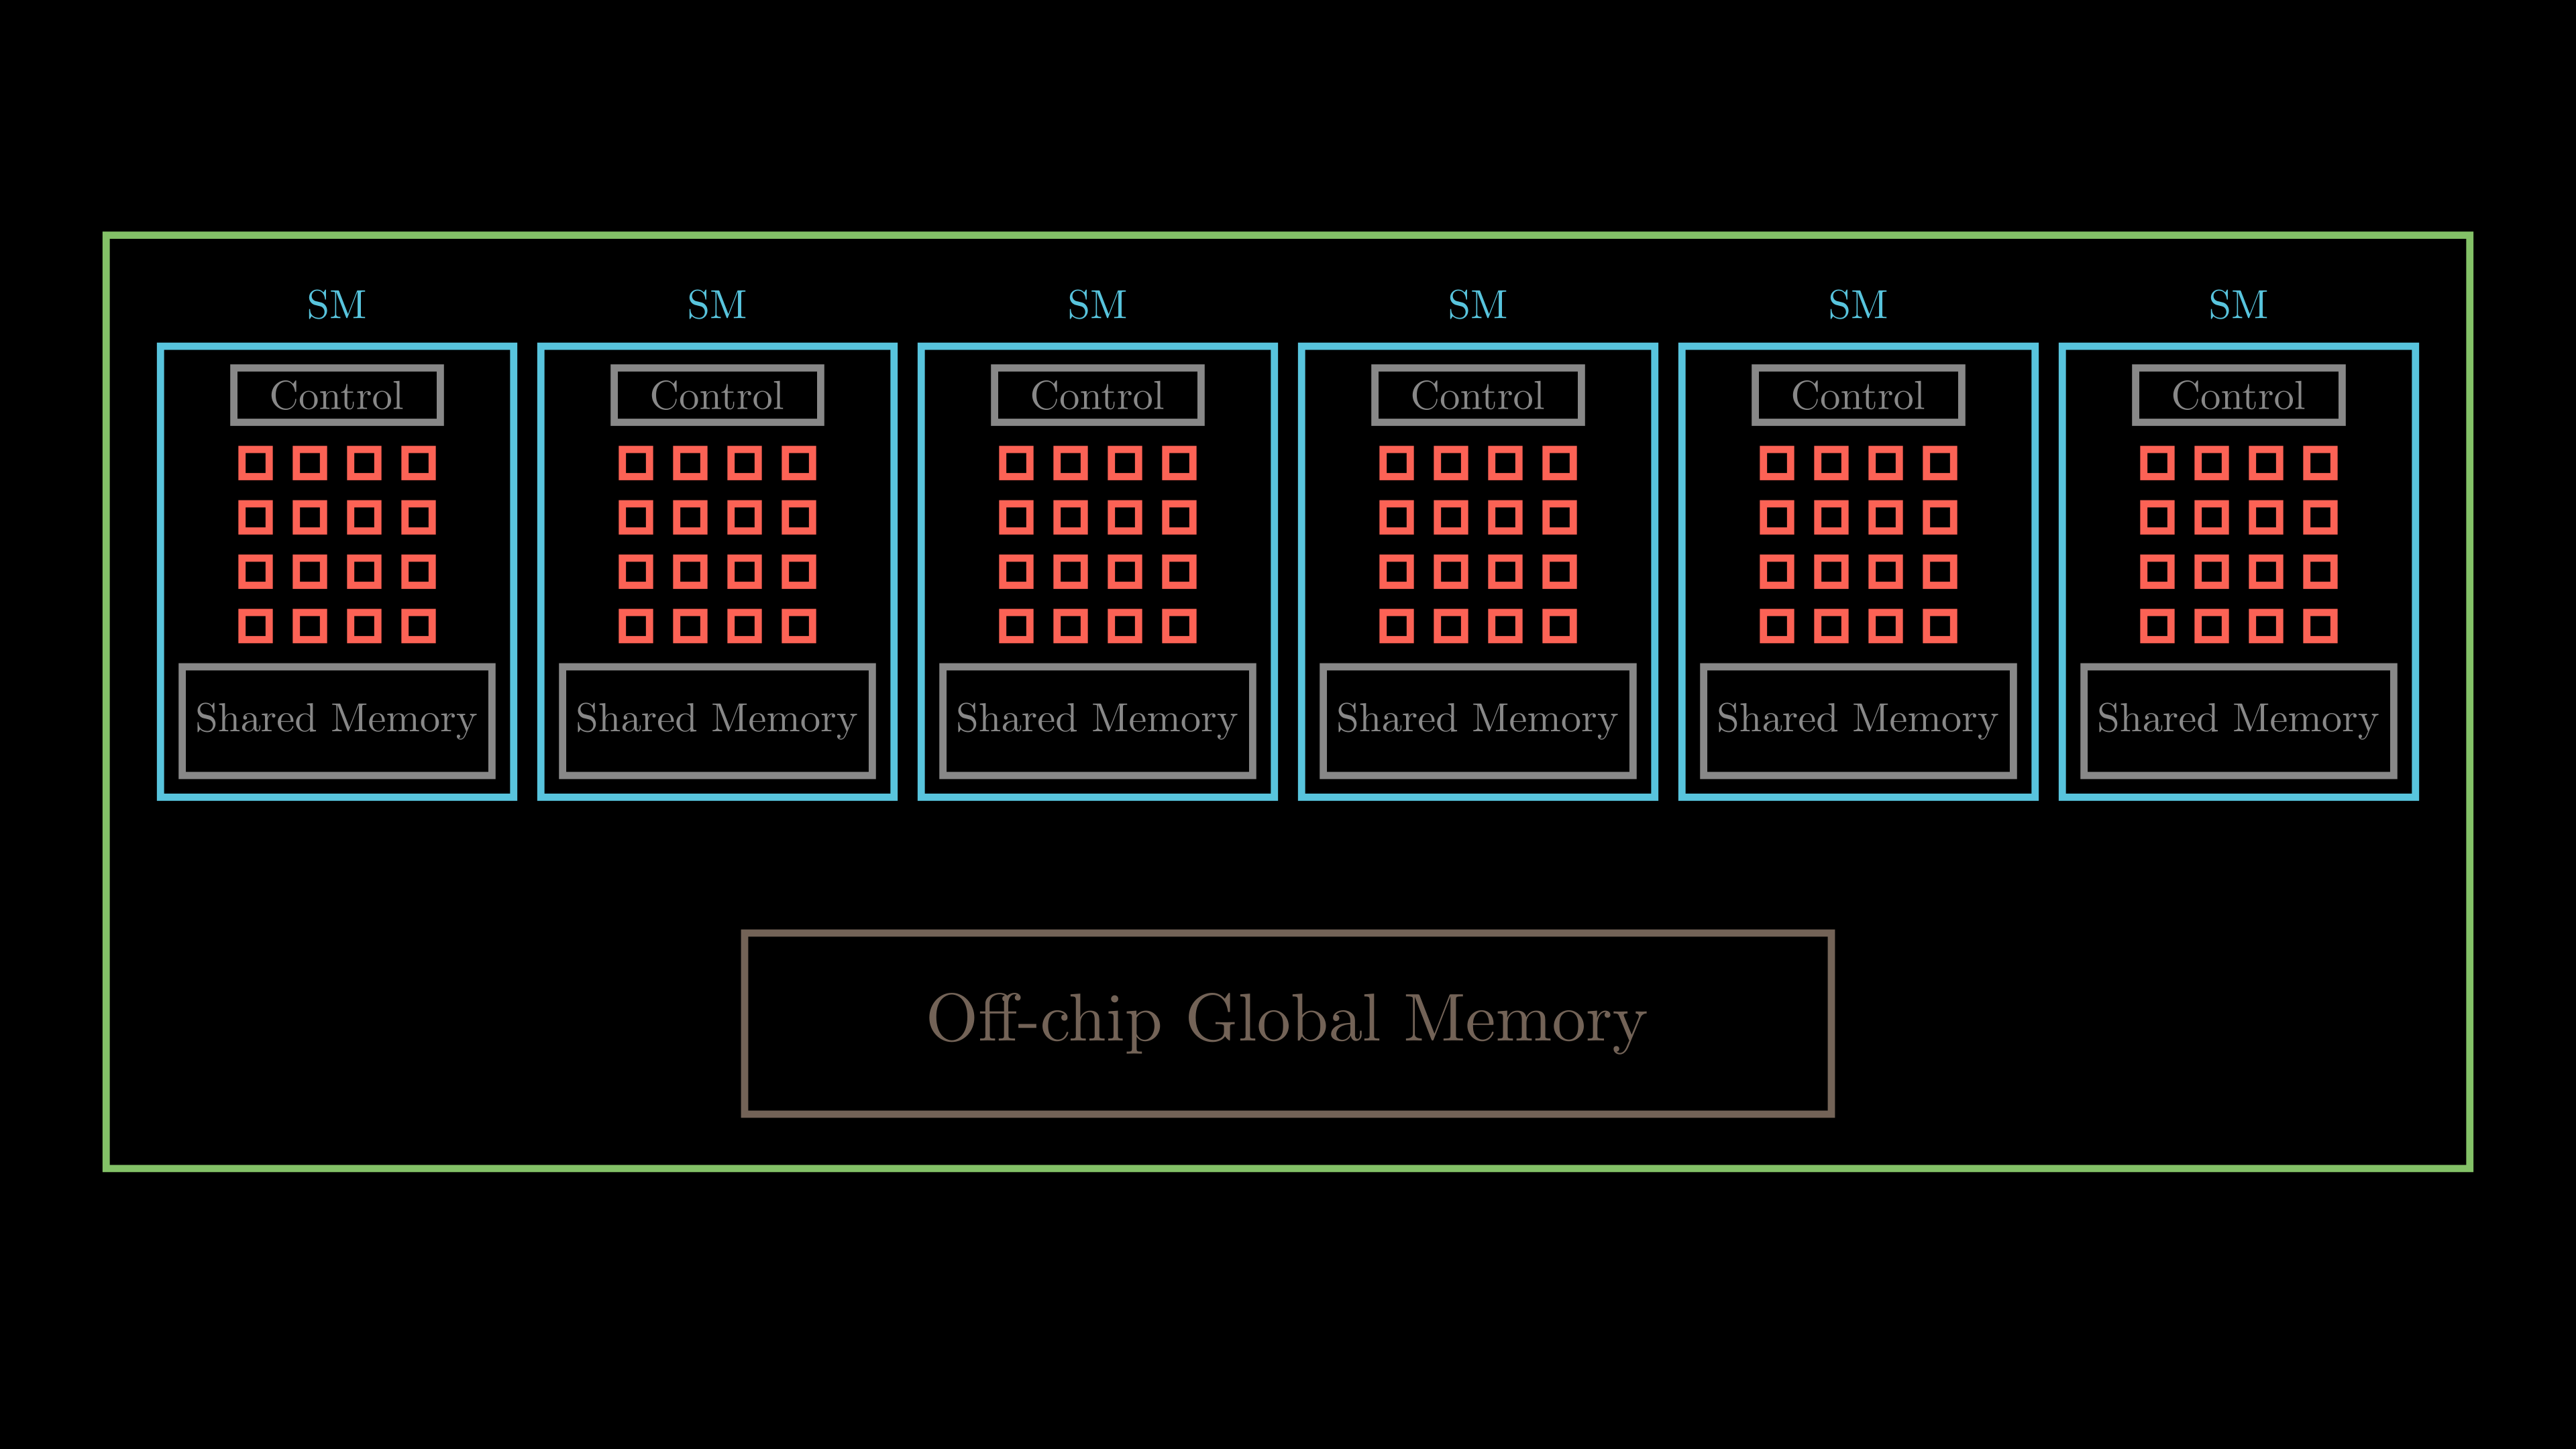

In [125]:
%%manim -qk -v WARNING Thumbnail

class Thumbnail(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        memory_unit = Rectangle(width=2.85, height=1, color=GRAY).next_to(cuda_cores, DOWN)
        memory_text = Tex(r"Shared Memory", color=GRAY).scale(0.75).move_to(memory_unit)
        memory = VGroup(memory_unit, memory_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores, memory), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores, memory)

    def gen_sms(self, num):
        SMs = VGroup(self.generate_sm())
        for i in range(1, num):
            SMs.add(self.generate_sm().next_to(SMs[-1], RIGHT))
        return SMs

    def construct(self):
        SMs = self.gen_sms(6).scale(0.6).move_to(ORIGIN).shift(1*UP)
        global_mem_unit = Rectangle(width=6, height=1, color=GRAY_BROWN).next_to(SMs, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Global Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        gpu_unit = SurroundingRectangle(VGroup(SMs, global_mem), color=GREEN, buff=0.3)
    
        self.add(gpu_unit, SMs, global_mem)